# Qiskit v2.0 Developer Certification Study Session #2

## Announcements:

* **Qiskit Advocate Program** is open for applications
    * Read more about it [here](https://www.ibm.com/quantum/blog/qiskit-advocate-program).
    * [Qiskit Learning is nice, free](https://quantum.cloud.ibm.com/learning/en), and provides the two mentioned entry courses for applying to the QAP
    * Passing the Qiskit v2.0 Dev Cert exam is an automatic qualifier for applying to the QAP to achieve Tier 0 status
* **Qiskit Fall Fest** will be coming up starting in October
    * University and non-University groups each host their own version of a FF
    * SQCM will likely again host an official or unofficial version, possibly on DoraHacks, stay-tuned
    * The Fall Fest usually involves solving Quantum Challenges setup in Jupyter notebooks
* **Qiskit Learning** recommended course
    * [Quantum Machine Learning](https://quantum.cloud.ibm.com/learning/en/courses/quantum-machine-learning)
* **How to install Qiskit**
    * [documentation on quantum.cloud.ibm.com](https://quantum.cloud.ibm.com/docs/en/guides)
* **In-person event at UVillage**, Wed 8/13, 6-8:30pm, Seattle Quantum Computing Meetup,
    * [rsvp here](https://www.meetup.com/seattle-quantum-computing-meetup/events/308400821/?eventOrigin=group_upcoming_events)

## Official IBM Site for the Exam

Here you can [read about it, Register, plus find a Study Guide and a Sample Test](https://www.ibm.com/training/certification/ibm-certified-quantum-computation-using-qiskit-v2x-developer-associate-C9008400).

* Number of questions: 68
* Number of questions to pass: 47 (~70%)
* Time allowed: 90 minutes


## SQCM Sample Exam in the SQCM github

You can git clone, or fork, the **qiskit_developer_certification** repo, if you like.

**Sample Exam Files and Study Session Presentations:**

In this sample exam I put a lot of text in many of the questions as a way to sorta incorporate a study guide into the exam.

You likely won't have to read that much during the actual exam.

* [Sample Exam pdf](https://github.com/SeattleQuantumComputingMeetup/qiskit_developer_certification/blob/main/Sample_Exam_Qiskit2.0_Developer_Certification_2025.pdf)

* [Sample Exam jupyter notebook and Study Session #1 Presentation (July 2025)](https://github.com/SeattleQuantumComputingMeetup/qiskit_developer_certification/blob/main/qiskit_dev_cert_exam_with_code_answers.ipynb)

* [Study Session #2 Presentation (August 2025)](https://github.com/SeattleQuantumComputingMeetup/qiskit_developer_certification/blob/main/qiskit_dev_cert_study_session_aug_2025.ipynb)


## Exam Topics

1. **Perform quantum operations** (16%)
    * Define Pauli Operators
    * Apply quantum operations
1. **Visualize quantum circuits, measurements, and states** (11%)
    * Visualize quantum circuits
    * Visualize quantum measurements
    * Visualize quantum states
1. **Create quantum circuits** (18%)
    * Construct dynamic circuits
    * Construct parameterized circuits
    * Transpile and optimize circuits
    * Construct basic quantum circuits
1. **Run quantum circuits** (15%)
    * Demonstrate an understanding of execution modes such as: session with dedicated, priority, and batch mode
    * Demonstrate understanding of how to run quantum circuits with real hardware using Qiskit Runtime primitives and applying broadcasting rules
1. **Use the sampler primitive** (12%)
    * Set sampler primitive options such as dynamical decoupling
    * Understand the theoretical background behind the sampler primitive
1. **Use the estimator primitive** (12%)
    * Set estimator primitive options (such as resilience levels)
    * Understand the theoretical background behind the estimator primitive
1. **Retrieve and analyze the results of quantum circuits** (10%)
    * Retrieve previous experiment results (session/Qiskit Runtime)
    * Monitor jobs
1. **Operate with OpenQASM and the REST API** (6%)
    * Structure types in OpenQASM 3 programs
    * Interpret OpenQASM semantics
    * Interoperate different versions of OpenQASM with Qiskit
    * Interact with the Qiskit IBM Runtime REST API   

#### Apply quantum gates, and visualize quantum states

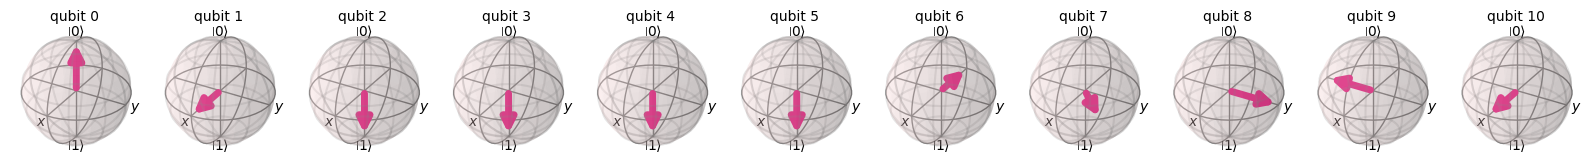

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np

qc = QuantumCircuit(11)
# do nothing to qubit 0
qc.h(1)
qc.x(2)
qc.cx(2,3)

qc.x(4)
qc.y(5)

qc.h(6) # apply the H gate to move to the horizontal plane in the middle of the sphere
qc.z(6) # Equivalent to a π radian rotation about the Z axis.

qc.h(7)
qc.t(7) # It induces a π/4 phase, and is sometimes called the pi/8 gate (because of how the RZ(pi/4) matrix looks like).
        # This is a non-Clifford gate and a fourth-root of Pauli-Z.
qc.h(8)
qc.s(8) # It induces a π/2 phase, and is sometimes called the P gate (phase). 
        # This is a Clifford gate and a square-root of Pauli-Z.

qc.rx(np.pi/2, 9)
qc.ry(np.pi/2, 10)

psi = Statevector(qc)
plot_bloch_multivector(psi)

#### Construct dynamic circuits

While these are early days of understanding how best to take advantage of dynamic circuits, 
the quantum research community has already identified a number of use cases, 
such as the following:

* Efficient quantum state preparation, such as GHZ state, W-state, (for more information about W-state, also refer to "State preparation by shallow circuits using feed forward") and a broad class of matrix product states
* Efficient long-range entanglement between qubits on the same chip by using shallow circuits
* Efficient sampling of IQP-like circuits (Instantaneous quantum polynomial time (IQP))

These improvements brought by dynamic circuits, however, come with trade-offs. Mid-circuit measurements and classical operations typically have longer execution time than two-qubit gates, and this increase in time might negate the benefits of reduced circuit depth. Therefore, reducing the length of mid-circuit measurement is a focus area of improvement as IBM Quantum® releases the [new version](https://quantum.cloud.ibm.com/announcements/en/product-updates/2025-03-03-new-version-dynamic-circuits) of dynamic circuits.


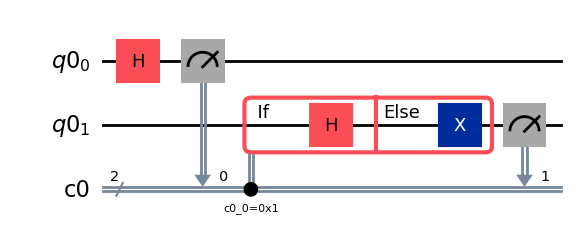

In [3]:
from qiskit import ClassicalRegister, QuantumRegister

qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)
 
circuit.draw("mpl")
 
# example output counts: {'01': 260, '11': 272, '10': 492}

#### Construct parameterized circuits

Parameterizing circuits allows for flexibility in defining and optimizing circuits 
without needing to know the specific parameter values upfront.

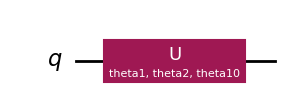

In [4]:
from qiskit.circuit import QuantumCircuit, Parameter

angles = [Parameter("theta1"), Parameter("theta2"), Parameter("theta10")]

circuit = QuantumCircuit(1)
circuit.u(*angles, 0)       # qiskit.circuit.library.UGate(theta, phi, lam, label=None), 
                            # Generic single-qubit rotation gate with 3 Euler angles.
                            # U(θ,ϕ,λ)
circuit.draw("mpl")

In [5]:
# note the parameters are in alphabetical order
circuit.parameters

ParameterView([Parameter(theta1), Parameter(theta10), Parameter(theta2)])

In [6]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

x = ParameterVector("x", 12)
circuit = QuantumCircuit(1)
for x_i in x:
    circuit.rx(x_i, 0)
circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7]), ParameterVectorElement(x[8]), ParameterVectorElement(x[9]), ParameterVectorElement(x[10]), ParameterVectorElement(x[11])])

#### Broadcasting Rules, when running quantum circuits

[documentation here](https://quantum.cloud.ibm.com/docs/en/guides/primitive-input-output)

Parameter value sets are represented by n x m arrays, and observable arrays are represented by one or more single-column arrays. 
<br><br>
For each example in the previous code, the parameter value sets are combined with their observable array to create the resulting expectation value estimates.
<br>

* Example 1: (broadcast single observable) has a parameter value set that is a 5x1 array and a 1x1 observables array. The one item in the observables array is combined with each item in the parameter value set to create a single 5x1 array where each item is a combination of the original item in the parameter value set with the item in the observables array.

* Example 2: (zip) has a 5x1 parameter value set and a 5x1 observables array. The output is a 5x1 array where each item is a combination of the nth item in the parameter value set with the nth item in the observables array.

* Example 3: (outer/product) has a 1x6 parameter value set and a 4x1 observables array. Their combination results in a 4x6 array that is created by combining each item in the parameter value set with every item in the observables array, and thus each parameter value becomes an entire column in the output.

* Example 4: (Standard nd generalization) has a 3x6 parameter value set array and two 3x1 observables array. These combine to create two 3x6 output arrays in a similar manner to the previous example.


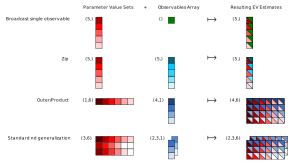

In [7]:
from IPython.display import SVG

# Assuming 'diagram.svg' is in the same directory as your notebook
SVG(filename='broadcasting_picture_for_params_and_observables.svg')

#### Execution Mode - Job, Batch, or Session

[Recommendations and best practices](https://quantum.cloud.ibm.com/docs/en/guides/choose-execution-mode)

* Generally, use batch mode unless you have workloads that don’t have all inputs ready at the outset.

* Use batch mode to submit multiple primitive jobs simultaneously to shorten processing time.

* Use session mode for iterative workloads, or if you need dedicated access to the QPU.

* Always use job mode to submit a single primitive request.

* Because sessions are generally more expensive, it is recommended that you use batch whenever you don't need the additional benefits from using sessions.

* Open Plan users cannot submit session jobs.

To ensure the most efficient use of the execution modes, the following practices are recommended:

* There is a fixed overhead associated with running a job. In general, if each of your jobs uses less than one minute of QPU time, consider combining several into one larger job (this applies to all execution modes). "QPU time" refers to time spent by the QPU complex to process your job.

* If each of your jobs consumes more than one minute of QPU time, or if combining jobs is not practical, you can still run multiple jobs in parallel. Every job goes through both classical and quantum processing. While a QPU can process only one job at a time, up to five classical jobs can be processed in parallel. You can take advantage of this by submitting multiple jobs in batch or session execution mode.

The above are general guidelines, and you should tune your workload to find the optimal ratio, especially when using sessions. For example, if you are using a session to get exclusive access to a backend, consider breaking up large jobs into smaller ones and running them in parallel. This might be more cost-effective because it can reduce wall-clock time.

#### Example from: Qiskit Global Summer School Lab 2 - Error Mitigation with the QAOA Max-Cut problem

[Lab 2: Cutting through the noise](https://github.com/qiskit-community/qgss-2025/tree/main/lab-2)

At the end, there is an exercise to run on real hardware, and the code snippets below were taken from that last section.


#### When to use Sampler, When to use Estimator?

The two most common tasks for quantum computers are: 
* sampling quantum states
* calculating expectation values.

These tasks motivated the design of the Qiskit primitives: Estimator and Sampler.

**Estimator:**
* computes expectation values of observables with respect to states prepared by quantum circuits.

  
**Sampler:** 
* samples the output register from quantum circuit execution.


In short, the computational model introduced by the Qiskit primitives moves quantum programming one step closer to where classical programming is today, where the focus is less on the hardware details and more on the results you are trying to achieve.
 

#### Sampler Options

Enabling the error mitigation technique, dynamical decoupling, in the example below.



**Sampler PUB:** (just for reference in the code below)


is typically a tuple containing: (from the example: `(circuit_ext_opt_seed, opt_params_sim)`)
* a quantum circuit
* parameter values (if the circuit is parametric)
* the number of shots (optional).  
<br>

##### We execute on hardware
`sampler = Sampler(mode=best_backend_hw)`
##### Set runtime options directly on the sampler
`sampler.options.dynamical_decoupling.enable = True` <br>
`job = sampler.run([(circuit_ext_opt_seed, opt_params_sim)], shots=SHOTS)` <br>
`results_sampler = job.result()` <br>
`counts_list_hw_EM = results_sampler[0].data.meas.get_counts()` <br>
`display(plot_histogram(counts_list_hw_EM, title=f"Max cut with {best_backend_hw.name} with EM"))` <br>

#### Estimator Options

Enabling many error mitigation techniques in the example below.

**Estimator PUB:** (just to keep in mind, relative to the one for Sampler mentioned above)


is usually a tuple containing:
* a quantum circuit
* observables
* parameter values (if needed)
* a target precision for expectation value estimation (optional).

##### Prepare to run on real hardware - set options to enable various error mitigation methods

```options = EstimatorOptions(default_shots=100000)
# Dynamical Decoupling
options.dynamical_decoupling.enable = True

# Probabilistic Twirling
options.twirling.enable_gates = True
options.twirling.num_randomizations = 10
options.twirling.shots_per_randomization = 10000

# TREX
options.resilience.measure_mitigation = True
options.resilience.measure_noise_learning.num_randomizations = 10
options.resilience.measure_noise_learning.shots_per_randomization = 10000

# ZNE setup
options.resilience.zne_mitigation = True
options.resilience.zne.amplifier = "gate_folding"
options.resilience.zne.extrapolator = "polynomial_degree_2"
options.resilience.zne.noise_factors = (1, 3, 5)

# We execute on hardware
estimator_EM = Estimator(mode=best_backend_hw, options=options)


#### Monitor Jobs - on the platform and programmatically

**Some notes:**

1. job.result() is blocking: When calling job.result(), your program will wait until the job completes.

2. **You can cancel a job from the IBM Quantum Platform dashboard** either on the Workloads page or the details page for a specific workload. On the Workloads page, click the overflow menu at the end of the row for that workload, and select Cancel. If you are on the details page for a specific workload, use the Actions dropdown at the top of the page, and select Cancel.

3. In qiskit, job.cancel() will cancel a job.

4. job.status() to check the job's status

5. job.job_id() - it is recommended that you save the job ID of jobs you might want to retrieve later.

6. job = service.job(job_id) - will allow you to retrieve a job previously submitted. 
 

#### OpenQASM - [going between Qiskit and OpenQASM](https://quantum.cloud.ibm.com/docs/en/guides/interoperate-qiskit-qasm3)

Currently two high-level functions are available for importing from OpenQASM 3 into Qiskit:
* load(), which takes a file name
* loads(), which takes the program itself as a string.
  
You can export Qiskit code to OpenQASM 3 with:
* dumps(), which exports to a string
* dump(), which exports to a file.

[In the example below](https://quantum.cloud.ibm.com/docs/en/guides/interoperate-qiskit-qasm3), 

we define a quantum program using OpenQASM 3, and use loads() to directly convert it into a QuantumCircuit:


(the code below requires:  `pip install qiskit_qasm3_import` in your python environment)

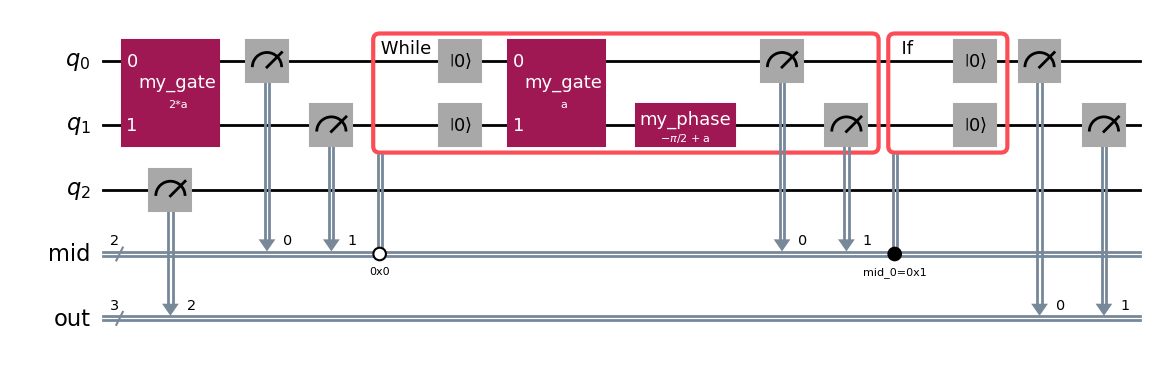

In [8]:
import qiskit.qasm3
 
program = """
    OPENQASM 3.0;
    include "stdgates.inc";
 
    input float[64] a;
    qubit[3] q;
    bit[2] mid;
    bit[3] out;
 
    let aliased = q[0:1];
 
    gate my_gate(a) c, t {
      gphase(a / 2);
      ry(a) c;
      cx c, t;
    }
    gate my_phase(a) c {
      ctrl @ inv @ gphase(a) c;
    }
 
    my_gate(a * 2) aliased[0], q[{1, 2}][0];
    measure q[0] -> mid[0];
    measure q[1] -> mid[1];
 
    while (mid == "00") {
      reset q[0];
      reset q[1];
      my_gate(a) q[0], q[1];
      my_phase(a - pi/2) q[1];
      mid[0] = measure q[0];
      mid[1] = measure q[1];
    }
 
    if (mid[0]) {
      let inner_alias = q[{0, 1}];
      reset inner_alias;
    }
 
    out = measure q;
"""
circuit = qiskit.qasm3.loads(program)
circuit.draw("mpl")

#### Runtime REST API

Here is an example, using the Estimator primitive, and the real QPU, ibm_brisbane.

Note: 
* the PUB contains a string of OPENQASM3 code to describe the circuit, rather than a qiskit definition.
    * `OPENQASM 3.0; include \"stdgates.inc\";`
    * `bit[1] c;`
    * `x $0;`
    * `c[0] = measure $0;` 
* the second element of the PUB is the observable, which in this case is "Z"
* error mitigation in the form of dynamical decoupling has been enabled

```import requests
import json
 
reqUrl = "https://quantum.cloud.ibm.com/api/v1/jobs"
 
headersList = {
  "Accept": "application/json",
  "Authorization": "Bearer <YOUR_BEARER_TOKEN>",
  "Service-CRN": "<YOUR_INSTANCE_CRN>"
  "Content-Type": "application/json"
}
 
payload = json.dumps({
  "program_id": "estimator",
  "backend": "ibm_brisbane",
  "params": {
    "pubs": [[
      "OPENQASM 3.0; include \"stdgates.inc\"; bit[1] c; x $0; c[0] = measure $0;", "Z"
    ]],
    "options": {"dynamical_decoupling": {"enable": True}},
    "version": 2,
    "resilience_level": 1
  }
})
 
response = requests.request("POST", reqUrl, data=payload,  headers=headersList)
 
print(response.json())

**Note:**


While Qiskit SDK provides tools to build quantum circuits programmatically in Python, these circuits need to be converted to OpenQASM strings before being sent to the Qiskit Runtime REST API.